In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D  #2Dfigure (word vector:1D)
from keras.utils import np_utils #Transfer numbers to 1D vectors ex: 1>>[0,1,0,0,0,0,0,0,0,0]
from keras.optimizers import Adam #maybe SGD, GD, Adadelta .etc 
import keras.callbacks

Using TensorFlow backend.


# ---Load training/testing data from Mnist---

http://yann.lecun.com/exdb/mnist/

In [3]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()
#Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [4]:
print(
"Scale of x0_train:",x0_train.shape,"\n", 
"Scale of y0_train:",y0_train.shape,"\n",
"Scale of x0_test:",x0_test.shape,"\n",     
"Scale of y0_test:",y0_test.shape,"\n",
) #Check the dimensions of your input datasets.

Scale of x0_train: (60000, 28, 28) 
 Scale of y0_train: (60000,) 
 Scale of x0_test: (10000, 28, 28) 
 Scale of y0_test: (10000,) 



In [5]:
x_train = x0_train.reshape(60000, 28, 28, 1)
x_test = x0_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train / 255
x_test = x_test / 255

In [6]:
y_train = np_utils.to_categorical(y0_train, 10)
y_test = np_utils.to_categorical(y0_test, 10)

In [7]:
print(
"Scale of x_train:",x_train.shape,"\n", 
"Scale of y_train:",y_train.shape,"\n",
"Scale of x_test:",x_test.shape,"\n",     
"Scale of y_test:",y_test.shape,"\n",
)  #Check the dimensions of your training datasets.

Scale of x_train: (60000, 28, 28, 1) 
 Scale of y_train: (60000, 10) 
 Scale of x_test: (10000, 28, 28, 1) 
 Scale of y_test: (10000, 10) 



In [8]:
print(y0_test[2])

1


# ---Modeling---

In [9]:
model = Sequential()
N_F=15 #Number of Filters
N_C=3  #Dims of Filters
N_MP=2 #Dims of MaxPooling
N_N=200 #Number of Neurals
N_CA=10 #Number of catergories

In [10]:
model.add(Conv2D(N_F, (N_C, N_C), padding='same', input_shape=(28,28,1)))  #some diff between Theano & Tensorflow
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(N_MP, N_MP)))

In [11]:
model.add(Conv2D(N_F, (N_C, N_C)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(N_MP, N_MP)))

In [12]:
model.add(Conv2D(N_F, (N_C, N_C)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(N_MP, N_MP)))

In [13]:
model.add(Flatten())
model.add(Dense(N_N))
model.add(Activation('relu'))

In [14]:
model.add(Dense(N_CA))
model.add(Activation('softmax'))

# ---Start to compile n learn this CNN---


In [15]:
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])
model.summary() #to check ur NN structure

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 15)        150       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        2040      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 15)          2040      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 60)                0         
__________

In [16]:
hist=model.fit(x_train, y_train, batch_size=128, epochs=8,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 28s - loss: 0.3897 - acc: 0.8835 - val_loss: 0.1030 - val_acc: 0.9708

In [17]:
result = model.predict_classes(x_test)  ##These are the predictions after training

10000/10000 [==============================] - 2s     

In [18]:
score = model.evaluate(x_test, y_test)  #####這裡數字出問題
loss, acc = score

 9920/10000 [============================>.] - ETA: 0s

In [19]:
print("loss=",loss)
print("accuracy=",acc)

loss= 0.0347377211598
accuracy= 0.9881


### Plot and some test after training

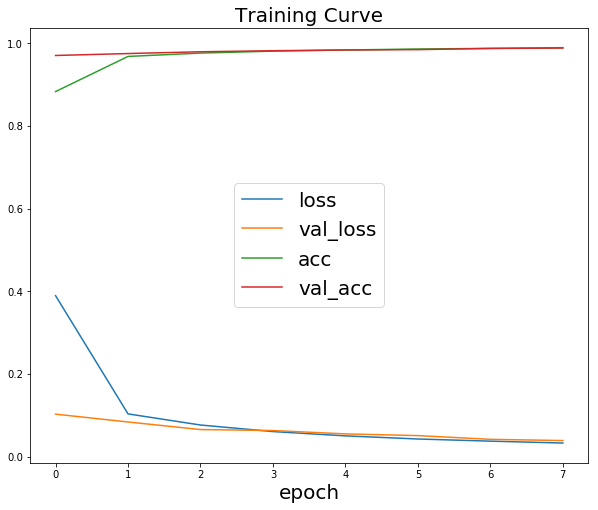

In [30]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.plot(hist.history['acc']) 
plt.plot(hist.history['val_acc']) 
plt.title('Training Curve',fontsize=20)  
#plt.ylabel('loss')  
plt.xlabel('epoch',fontsize=20)  
plt.legend(['loss','val_loss', 'acc','val_acc'], loc='center', fontsize=20)  
plt.show()

In [21]:
print (hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [22]:
# Check which items we got right / wrong
correct_indices = np.nonzero(result == y0_test)[0]
incorrect_indices = np.nonzero(result != y0_test)[0]
print(np.array(incorrect_indices).ndim)
print(incorrect_indices) ##incorrect_indices,correct_indices are 2 arrays
N_incorrect=np.array(incorrect_indices).size
print(N_incorrect)

1
[ 247  326  445  582  619  646  684  740  882  938  947  965  982 1014 1112
 1114 1156 1182 1226 1232 1290 1299 1319 1393 1425 1522 1527 1621 1681 1709
 1901 2018 2035 2040 2098 2109 2118 2130 2135 2182 2189 2293 2369 2387 2406
 2414 2488 2573 2597 2607 2654 2720 2758 2896 2921 2930 2953 2995 3060 3073
 3422 3457 3503 3533 3558 3559 3567 3767 3808 3811 3838 3846 3985 4065 4075
 4093 4176 4201 4207 4224 4360 4369 4443 4507 4536 4740 4751 4761 4814 4823
 5165 5887 5937 5955 5973 6091 6101 6505 6555 6571 6572 6597 6783 7216 7849
 8316 8332 8408 8527 9009 9505 9530 9638 9642 9664 9716 9729 9770 9904]
119


Prediction: 2 
 Answer: 2 
 Index: [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


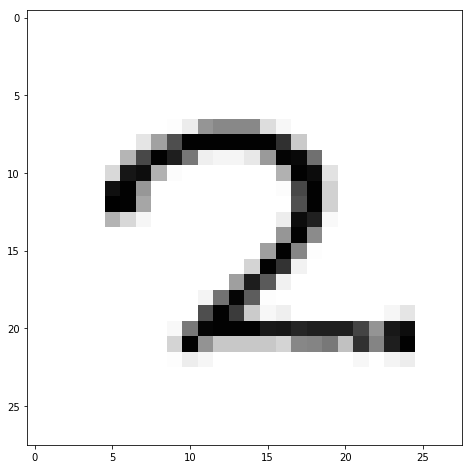

In [23]:
wrong=77
print("Prediction:",result[wrong],"\n","Answer:",y0_test[wrong],"\n","Index:",y_test[wrong])
plt.imshow(x0_test[wrong], cmap='Greys')

# ---END--- 

# ---Let's try to identify these hand-written numbers---

In [24]:
pick = np.random.randint(1,10,25)

In [25]:
x0_test.shape

(10000, 28, 28)

### Correct

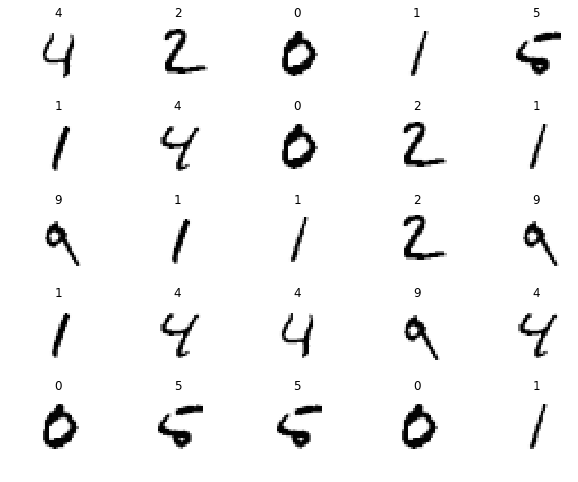

In [26]:
plt.subplots_adjust(wspace=0.5, hspace=0.5) #call matplot
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title(result[pick[i]])
    plt.imshow(x0_test[pick[i]], cmap='Greys')
    plt.axis("off")

### Incorrect

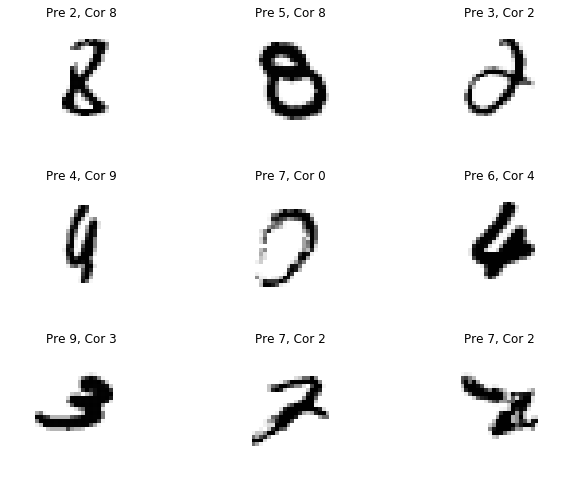

In [27]:
pick1 = np.random.randint(0,N_incorrect,9)
plt.subplots_adjust(wspace=0.5, hspace=0.5) #call matplot

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x0_test[incorrect_indices[pick1[i]]], cmap='Greys', interpolation='none')
    plt.title("Pre {}, Cor {}".format(result[incorrect_indices[pick1[i]]], y0_test[incorrect_indices[pick1[i]]])) #Predict, Correct
    #plt.title(y0_test[pick[i]]result[pick1[i]])
    plt.axis("off")